# Crafting Table

## Instalación e inicialización

Opcionalmente, creamos un entrono virtual. 

In [ ]:
# Creamos un entorno virtual para instalar las dependencias
!python3 -m venv venv
# Activamos el entorno virtual
!source venv/bin/activate
# Reiniciar notebook y escoger el kernel del venv que se acaba de crear

La librería usa python >=3.10, <3.14.

In [3]:
!python --version

Python 3.10.5


Para instalarlo debemos clonar el repositorio donde se encuentra el código e instalar las dependencias necesarias.

In [1]:
# Clonamos el repositorio de GitHub con el código
!git clone https://github.com/diegovelilla/TFG.git

Cloning into 'TFG'...


Antes de clonar las dependencias suele ser recomendable actualizar pip.

Las dependencias se han separado en 2 ficheros distintos, dependiendo de si se requiere uso de GPU o no.

Por último, instalamos las dependencias adicionales que usaremos en este notebook.

In [ ]:
!pip install --upgrade --quiet pip 
#!pip install -r TFG/requirements-cpu.txt --quiet
!pip install -r TFG/requirements-gpu.txt --quiet
!pip install ucimlrepo --quiet # opción secundaria para el importe de datos. A veces da errores.
!pip install matplotlib --quiet
!pip install seaborn --quiet

In [4]:
from sklearn.datasets import load_iris
import pandas as pd

# Cargar desde sklearn
iris_data = load_iris(as_frame=True)

# Obtener features y target
iris_x = iris_data.data
iris_y = iris_data.target
iris = pd.concat([iris_x, iris_y.rename("class")], axis=1)

In [5]:
from TFG.CraftingTable import CTGAN, TVAE, TabDDPM, TabSyn
ctgan = CTGAN()
tvae = TVAE()
tabddpm = TabDDPM()
tabsyn = TabSyn()

## Entrenamiento de los modelos

Para entrenar los modelos es tan sencillo como llamar a la función *fit* de cada modelo con los datos reales y la lista de columnas categóricas. 

Adicionalmente, podemos indicar otros parámetros opcionales para personalizar el entrenamiento.

In [4]:
print("Entrenando CTGAN con CPU...")
ctgan.fit(train_data=iris, discrete_columns=['class'], epochs=5000, batch_size=50, device='cpu', verbose=True)
print("\nEntrenando TVAE con CPU...")
tvae.fit(train_data=iris, discrete_columns=['class'], epochs=5000, batch_size=50, device='cpu', verbose=True)
print("\nEntrenando TabDDPM con GPU...")
tabddpm.fit(train_data=iris, discrete_columns=['class'], epochs=5000, batch_size=50, device='cuda', verbose=True)
print("\nEntrenando TabSyn con GPU...")
tabsyn.fit(train_data=iris, discrete_columns=['class'], vae_epochs=50, mlp_epochs=50, batch_size=50, device='cuda', verbose=True)

Entrenando CTGAN con CPU...
Using CPU for training.


Gen. (0.44) | Discrim. (0.55): 100%|██████████| 5000/5000 [03:13<00:00, 25.79it/s]  



Entrenando TVAE con CPU...
Using CPU for training.


Loss: -20.853: 100%|██████████| 5000/5000 [01:23<00:00, 59.53it/s]



Entrenando TabDDPM con GPU...
Using CUDA for training.


Loss: 0.7715: 100%|██████████| 5000/5000 [00:35<00:00, 140.70it/s]



Entrenando TabSyn con GPU...
Using CUDA for training.


VAE Loss: 0.0116: 100%|██████████| 50/50 [03:50<00:00,  4.61s/it]


Successfully saved pretrained embeddings to disk!


MLP Loss: 0.3782: 100%|██████████| 50/50 [02:23<00:00,  2.87s/it]


## Metadatos

Una vez entrenados los modelos, podemos consultar metadatos sobre los datos usados para su entrenamiento.

In [9]:
print(ctgan.get_metadata()['table']['columns']['sepal length (cm)'])
print(tvae.get_metadata()['table']['columns']['sepal width (cm)'])
print(tabddpm.get_metadata()['table']['columns']['petal length (cm)'])
print(tabsyn.get_metadata()['table']['columns']['petal width (cm)'])

{'dtype': 'float64', 'max': 7.9, 'min': 4.3, 'avg': 5.843333333333334, 'std': 0.8253012917851409, 'median': 5.8}
{'dtype': 'float64', 'max': 4.4, 'min': 2.0, 'avg': 3.0573333333333337, 'std': 0.4344109677354946, 'median': 3.0}
{'dtype': 'float64', 'max': 6.9, 'min': 1.0, 'avg': 3.7580000000000005, 'std': 1.759404065775303, 'median': 4.35}
{'dtype': 'float64', 'max': 2.5, 'min': 0.1, 'avg': 1.1993333333333336, 'std': 0.7596926279021594, 'median': 1.3}


In [10]:
print(ctgan.get_metadata()['table']['correlations']['sepal length (cm)'])
print(tvae.get_metadata()['table']['correlations']['sepal width (cm)'])
print(tabddpm.get_metadata()['table']['correlations']['petal length (cm)'])
print(tabsyn.get_metadata()['table']['correlations']['petal width (cm)'])

{'petal length (cm)': 0.8717537758865835, 'petal width (cm)': 0.8179411262715758, 'sepal length (cm)': 1.0, 'sepal width (cm)': -0.11756978413300088}
{'petal length (cm)': -0.4284401043305386, 'petal width (cm)': -0.3661259325364377, 'sepal length (cm)': -0.11756978413300088, 'sepal width (cm)': 1.0}
{'petal length (cm)': 1.0, 'petal width (cm)': 0.962865431402796, 'sepal length (cm)': 0.8717537758865835, 'sepal width (cm)': -0.4284401043305386}
{'petal length (cm)': 0.962865431402796, 'petal width (cm)': 1.0, 'sepal length (cm)': 0.8179411262715758, 'sepal width (cm)': -0.3661259325364377}


Además, la librería también guarda metadatos sobre el propio modelo e hyperparámetros usados.

In [ ]:
print(ctgan.get_metadata()['model']['model_type'])
print(ctgan.get_metadata()['model']['hyperparameters'])
print()

print(tvae.get_metadata()['model']['model_type'])
print(tvae.get_metadata()['model']['hyperparameters'])
print()

print(tabddpm.get_metadata()['model']['model_type'])
print(tabddpm.get_metadata()['model']['hyperparameters'])
print()

print(tabsyn.get_metadata()['model']['model_type'])
print(tabsyn.get_metadata()['model']['hyperparameters'])
print()

CTGAN
{'embeddig_dim': 128, 'generator_dim': (256, 256), 'discriminator_dim': (256, 256)}

TVAE
{'embeddig_dim': 128, 'compress_dims': (128, 128), 'decompress_dims': (128, 128)}

TabDDPM_MLP
{'dim_t': 256, 'd_layers': (8, 16), 'dropout': 0.1}

TabSyn
{'num_layers_vae': 2, 'factor_vae': 32, 'n_head_vae': 1, 'd_token_vae': 4, 'dim_t_mlp': 512}



Por último, podemos consultar también información sobre el entrenamiento de cada modelo.

In [62]:
print(f"Veces entrenado: {ctgan.get_metadata()['model']['fit_settings']['times_fitted']}")
print(f"Duración: {ctgan.get_metadata()['model']['fit_settings']['fit_history'][-1]['duration']}")
print("Parámetros: ",)
for k, v in ctgan.get_metadata()['model']['fit_settings']['fit_history'][-1]['parameters'].items():
    print(f"    {k}: {v}")
ctgan.get_metadata()['model']['fit_settings']['fit_history'][-1]['loss'][-15:]

Veces entrenado: 1
Duración: 0:03:18
Parámetros: 
    device: cpu
    epochs: 5000
    batch_size: 50
    generator_lr: 0.0002
    generator_decay: 1e-06
    discriminator_lr: 0.0002
    discriminator_decay: 1e-06
    discriminator_steps: 1


,Epoch,Generator Loss,Discriminator Loss
4985,4985,0.226806,0.489191
4986,4986,-0.086695,-0.608414
4987,4987,-0.409867,0.949151
4988,4988,-0.512807,-1.156794
4989,4989,-0.484479,0.082247
4990,4990,-0.230081,-0.838329
4991,4991,1.158649,-1.124544
4992,4992,0.030039,-0.113346
4993,4993,-0.118749,0.431803
4994,4994,-0.398105,0.344827


In [61]:
print(f"Veces entrenado: {tvae.get_metadata()['model']['fit_settings']['times_fitted']}")
print(f"Duración: {tvae.get_metadata()['model']['fit_settings']['fit_history'][-1]['duration']}")
print("Parámetros: ",)
for k, v in tvae.get_metadata()['model']['fit_settings']['fit_history'][-1]['parameters'].items():
    print(f"    {k}: {v}")
tvae.get_metadata()['model']['fit_settings']['fit_history'][-1]['loss'][-15:]

Veces entrenado: 1
Duración: 0:01:24
Parámetros: 
    batch_size: 50
    epochs: 5000
    device: cpu
    l2_scale: 1e-05
    loss_factor: 2


,Epoch,Loss
4985,4985,-19.664181
4986,4986,-19.821409
4987,4987,-20.136208
4988,4988,-20.673161
4989,4989,-19.970119
4990,4990,-20.946209
4991,4991,-20.906553
4992,4992,-20.990906
4993,4993,-19.758051
4994,4994,-21.295341


In [60]:
print(f"Veces entrenado: {tabddpm.get_metadata()['model']['fit_settings']['times_fitted']}")
print(f"Duración: {tabddpm.get_metadata()['model']['fit_settings']['fit_history'][-1]['duration']}")
print("Parámetros: ",)
for k, v in tabddpm.get_metadata()['model']['fit_settings']['fit_history'][-1]['parameters'].items():
    print(f"    {k}: {v}")
tabddpm.get_metadata()['model']['fit_settings']['fit_history'][-1]['loss'][-15:]

Veces entrenado: 1
Duración: 0:00:35
Parámetros: 
    device: cuda
    epochs: 5000
    lr: 0.005
    weight_decay: 0.0001
    batch_size: 50
    num_timesteps: 1000


,Epoch,Loss
4985,4985.0,0.5932
4986,4986.0,0.7573
4987,4987.0,0.7824
4988,4988.0,0.6533
4989,4989.0,0.6722
4990,4990.0,0.6935
4991,4991.0,0.6659
4992,4992.0,0.7411
4993,4993.0,0.6593
4994,4994.0,0.6096


In [63]:
print(f"Veces entrenado: {tabsyn.get_metadata()['model']['fit_settings']['times_fitted']}")
print(f"Duración: {tabsyn.get_metadata()['model']['fit_settings']['fit_history'][-1]['duration']}")
print("Parámetros: ",)
for k, v in tabsyn.get_metadata()['model']['fit_settings']['fit_history'][-1]['parameters'].items():
    print(f"    {k}: {v}")
tabsyn.get_metadata()['model']['fit_settings']['fit_history'][-1]['loss']['vae_loss'][-15:]

Veces entrenado: 1
Duración: {'vae_duration': '0:03:50', 'mlp_duration': '0:02:23'}
Parámetros: 
    device: cuda
    vae_epochs: 50
    mlp_epochs: 50
    batch_size: 50
    lr: 0.001
    max_beta: 0.01
    min_beta: 1e-05
    lambda: 0.7
    weight_decay: 0


,Epoch,Vae Loss
35,35,0.013080
36,36,0.011155
37,37,0.009913
38,38,0.010109
39,39,0.009374
40,40,0.009462
41,41,0.007661
42,42,0.007687
43,43,0.007795
44,44,0.006046


In [59]:
tabsyn.get_metadata()['model']['fit_settings']['fit_history'][-1]['loss']['mlp_loss'][-15:]

,Epoch,MLP Loss
35,35,0.350489
36,36,0.377854
37,37,0.441902
38,38,0.346506
39,39,0.325930
40,40,0.357212
41,41,0.358664
42,42,0.365620
43,43,0.363711
44,44,0.324463


## Guardado / Carga de modelos

Una vez entrenados los modelos, podemos guardar estas instancias para poder cargarlas en un futuro.

In [64]:
ctgan.save('saves/ctgan.pt')
tvae.save('saves/tvae.pt')
tabddpm.save('saves/tabddpm.pt')
tabsyn.save('saves/tabsyn.pt')

In [6]:
ctgan2 = CTGAN.load('saves/ctgan.pt')
tvae2 = TVAE.load('saves/tvae.pt')
tabddpm2 = TabDDPM.load('saves/tabddpm.pt')
tabsyn2 = TabSyn.load('saves/tabsyn.pt')

Esta guardado/carga mantiene tanto los modelos entrenados como sus metadatos anteriores.

In [75]:
print(ctgan.get_metadata()['table']['columns']['sepal length (cm)'])
print(ctgan2.get_metadata()['table']['columns']['sepal length (cm)'])
print()

print(tvae.get_metadata()['model']['model_type'])
print(tvae.get_metadata()['model']['hyperparameters'])
print(tvae2.get_metadata()['model']['model_type'])
print(tvae2.get_metadata()['model']['hyperparameters'])
print()

print(f"Veces entrenado: {tabddpm.get_metadata()['model']['fit_settings']['times_fitted']}")
print(f"Duración: {tabddpm.get_metadata()['model']['fit_settings']['fit_history'][-1]['duration']}")
print("Parámetros: ",)
for k, v in tabddpm.get_metadata()['model']['fit_settings']['fit_history'][-1]['parameters'].items():
    print(f"    {k}: {v}")

print(f"Veces entrenado: {tabddpm2.get_metadata()['model']['fit_settings']['times_fitted']}")
print(f"Duración: {tabddpm2.get_metadata()['model']['fit_settings']['fit_history'][-1]['duration']}")
print("Parámetros: ",)
for k, v in tabddpm2.get_metadata()['model']['fit_settings']['fit_history'][-1]['parameters'].items():
    print(f"    {k}: {v}")

{'dtype': 'float64', 'max': 7.9, 'min': 4.3, 'avg': 5.843333333333334, 'std': 0.8253012917851409, 'median': 5.8}
{'dtype': 'float64', 'max': 7.9, 'min': 4.3, 'avg': 5.843333333333334, 'std': 0.8253012917851409, 'median': 5.8}

TVAE
{'embeddig_dim': 128, 'compress_dims': (128, 128), 'decompress_dims': (128, 128)}
TVAE
{'embeddig_dim': 128, 'compress_dims': (128, 128), 'decompress_dims': (128, 128)}

Veces entrenado: 1
Duración: 0:00:35
Parámetros: 
    device: cuda
    epochs: 5000
    lr: 0.005
    weight_decay: 0.0001
    batch_size: 50
    num_timesteps: 1000
Veces entrenado: 1
Duración: 0:00:35
Parámetros: 
    device: cuda
    epochs: 5000
    lr: 0.005
    weight_decay: 0.0001
    batch_size: 50
    num_timesteps: 1000


## Muestreo

Por supuesto, la librería permite muestrear datos completamente nuevos de los modelos entrenados.

En el caso de la CTGAN podemos condicionar esta generación.

In [83]:
ctgan2.sample(10, condition_column='class', condition_value=1, force_value=False)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.156375,3.048959,0.969575,0.455050,0
1,6.953641,2.345448,4.840564,1.456826,2
2,6.377283,2.666385,5.739253,2.187563,2
3,4.811180,2.351812,3.911719,1.092592,1
4,4.981969,3.057930,5.063562,1.360918,1
5,6.054386,2.213790,4.443929,1.212013,1
6,6.691280,2.688192,5.270552,1.856599,0
7,5.473180,2.144689,3.688999,0.743934,1
8,6.054203,2.682227,4.524225,1.944946,1
9,6.076236,2.474134,3.888033,1.530123,2


In [ ]:
ctgan2.sample(10, condition_column='class', condition_value=1, force_value=True)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,6.716820,2.749882,5.224749,2.000724,1
1,5.497083,2.863173,3.909284,1.032653,1
2,6.149627,2.608503,5.617725,2.190987,1
3,5.257764,2.919788,4.166039,1.698968,1
4,6.409065,2.755739,3.231584,1.285404,1
5,5.074476,2.393885,5.155053,1.243100,1
6,5.826121,2.216662,4.878452,1.406717,1
7,5.717939,3.168056,4.960400,1.606056,1
8,5.415207,2.637214,5.437849,1.439062,1
9,6.278382,2.636938,4.980806,1.559967,1


## Evaluación estadística

La librería también permite evaluar la calidad de generación de los datos mediante tests estadísticos y medidas de distancia.

In [28]:
fake_data = ctgan2.sample(150)
print(f"Distancia CTGAN: {ctgan2.eval_stat(real_data=iris, test='mahalanobis', fake_data=fake_data)['value']:.3f}\n")
print(f"Distancia TVAE: {tvae2.eval_stat(real_data=iris, test='mahalanobis')['value']:.3f}\n")
print(f"Distancia TabDDPM: {tabddpm2.eval_stat(real_data=iris, test='mahalanobis')['value']:.3f}\n")
print(f"Distancia TabSyn: {tabsyn2.eval_stat(real_data=iris, test='mahalanobis')['value']:.3f}\n")

Distancia CTGAN: 0.793

No fake data provided, sampling from the model...
Sampled 150 rows of fake data.
Distancia TVAE: 0.204

No fake data provided, sampling from the model...

Sampled 150 rows of fake data.
Distancia TabDDPM: 3.781

No fake data provided, sampling from the model...
Sampled 150 rows of fake data.
Distancia TabSyn: 17.145



In [ ]:
res = ctgan2.eval_stat(real_data=iris, test='wasserstein_distance')
resl = []
for value in res['value']:
    resl.append(value['value'])
print("Distancia CTGAN:")
print(sum(resl)/len(resl))
print()

res = tvae2.eval_stat(real_data=iris, test='wasserstein_distance')
resl = []
for value in res['value']:
    resl.append(value['value'])
print("Distancia TVAE:")
print(sum(resl)/len(resl))
print()

res = tabddpm2.eval_stat(real_data=iris, test='wasserstein_distance')
resl = []
for value in res['value']:
    resl.append(value['value'])
print("Distancia TabDDPM:")
print(sum(resl)/len(resl))
print()

res = tabsyn2.eval_stat(real_data=iris, test='wasserstein_distance')
resl = []
for value in res['value']:
    resl.append(value['value'])
print("Distancia TabSyn:")
print(sum(resl)/len(resl))

No fake data provided, sampling from the model...
Sampled 150 rows of fake data.
Distancia CTGAN:
0.07594086651297098

No fake data provided, sampling from the model...
Sampled 150 rows of fake data.
Distancia TVAE:
0.06431663743524751

No fake data provided, sampling from the model...

Sampled 150 rows of fake data.
Distancia TabDDPM:
0.8429494541164431

No fake data provided, sampling from the model...
Sampled 150 rows of fake data.
Distancia TabSyn:
1.0172984713857287



In [35]:
print(f"Distancia CTGAN: {ctgan2.eval_stat(real_data=iris, test='energy_distance')['value']:.3f}\n")
print(f"Distancia TVAE: {tvae2.eval_stat(real_data=iris, test='energy_distance')['value']:.3f}\n")
print(f"Distancia TabDDPM: {tabddpm2.eval_stat(real_data=iris, test='energy_distance')['value']:.3f}\n")
print(f"Distancia TabSyn: {tabsyn2.eval_stat(real_data=iris, test='energy_distance')['value']:.3f}\n")

No fake data provided, sampling from the model...
Sampled 150 rows of fake data.
Distancia CTGAN: 0.060

No fake data provided, sampling from the model...
Sampled 150 rows of fake data.
Distancia TVAE: 0.019

No fake data provided, sampling from the model...

Sampled 150 rows of fake data.
Distancia TabDDPM: 1.299

No fake data provided, sampling from the model...
Sampled 150 rows of fake data.
Distancia TabSyn: 3.275



In [ ]:
from sklearn.tree import DecisionTreeClassifier
print(f"Accuracy CTGAN: {ctgan2.eval_stat(real_data=iris, test='two_sample_classifier', classifier=DecisionTreeClassifier())['value']*100}%\n")
print(f"Accuracy TVAE: {tvae2.eval_stat(real_data=iris, test='two_sample_classifier', classifier=DecisionTreeClassifier())['value']*100}%\n")
print(f"Accuracy TabDDPM: {tabddpm2.eval_stat(real_data=iris, test='two_sample_classifier', classifier=DecisionTreeClassifier())['value']*100}%\n")
print(f"Accuracy TabSyn: {tabsyn2.eval_stat(real_data=iris, test='two_sample_classifier', classifier=DecisionTreeClassifier())['value']*100}%\n")

No fake data provided, sampling from the model...
Sampled 150 rows of fake data.
Accuracy CTGAN: 75.0%

No fake data provided, sampling from the model...
Sampled 150 rows of fake data.
Accuracy TVAE: 65.0%

No fake data provided, sampling from the model...

Sampled 150 rows of fake data.
Accuracy TabDDPM: 100.0%

No fake data provided, sampling from the model...
Sampled 150 rows of fake data.
Accuracy TavSyn: 100.0%



In [52]:
print(f"KS-test CTGAN {ctgan2.eval_stat(real_data=iris, test='ks')['global']['statistic']:.3f}\n")
print(f"KS-test TVAE {tvae2.eval_stat(real_data=iris, test='ks')['global']['statistic']:.3f}\n")
print(f"KS-test TabDDPM {tabddpm2.eval_stat(real_data=iris, test='ks')['global']['statistic']:.3f}\n")
print(f"KS-test TabSyn {tabsyn2.eval_stat(real_data=iris, test='ks')['global']['statistic']:.3f}\n")

No fake data provided, sampling from the model...
Sampled 150 rows of fake data.
KS-test CTGAN 34.865

No fake data provided, sampling from the model...
Sampled 150 rows of fake data.
KS-test TVAE 13.749

No fake data provided, sampling from the model...

Sampled 150 rows of fake data.
KS-test TabDDPM 307.662

No fake data provided, sampling from the model...
Sampled 150 rows of fake data.
KS-test TabSyn 1060.376



## Evaluación de aprendizaje automático

Como otra forma de evaluación, la librería también ofrece tests de aprendizaje automático.

In [58]:
print(f"Real: {ctgan2.eval_ml(real_data=iris, target_name='class', task='classification', model=DecisionTreeClassifier(), metrics=['accuracy'])['real']['accuracy']*100:.3f}")
print(f"CTGAN: {ctgan2.eval_ml(real_data=iris, target_name='class', task='classification', model=DecisionTreeClassifier(), metrics=['accuracy'])['fake']['accuracy']*100:.3f}")
print(f"TVAE: {tvae2.eval_ml(real_data=iris, target_name='class', task='classification', model=DecisionTreeClassifier(), metrics=['accuracy'])['fake']['accuracy']*100:.3f}")
print(f"TabDDPM: {tabddpm2.eval_ml(real_data=iris, target_name='class', task='classification', model=DecisionTreeClassifier(), metrics=['accuracy'])['fake']['accuracy']*100:.3f}")
print(f"TabSyn: {tabsyn2.eval_ml(real_data=iris, target_name='class', task='classification', model=DecisionTreeClassifier(), metrics=['accuracy'])['fake']['accuracy']*100:.3f}")

Real: 93.333
CTGAN: 95.556
TVAE: 97.778

TabDDPM: 17.778
TabSyn: 44.444


## Visualización

Por último, vamos a visualizar los datos generados respecto a los reales.

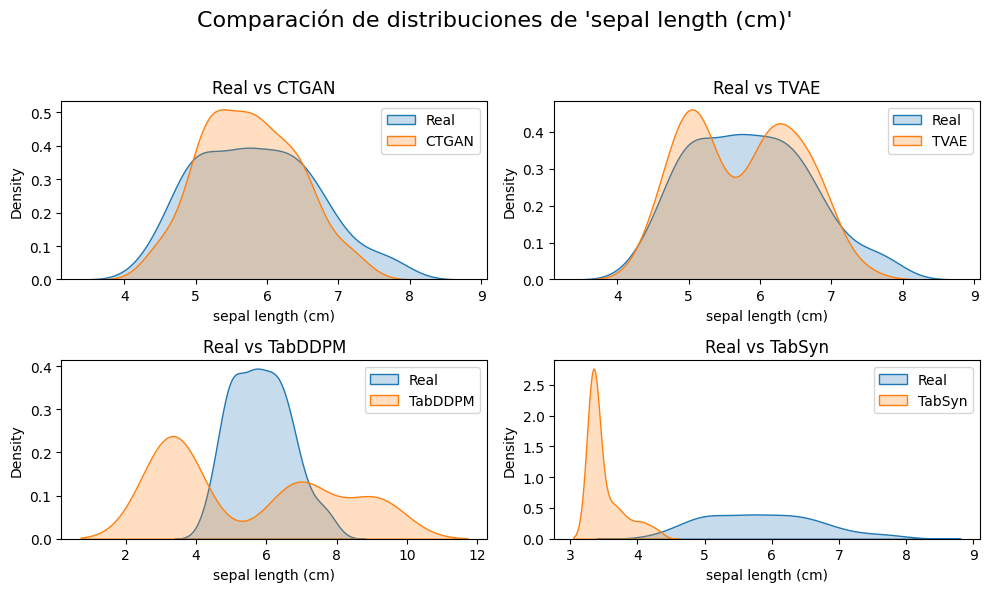

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_ctgan = ctgan2.sample(150)
df_tvae = tvae2.sample(150)
df_tabddpm = tabddpm2.sample(150)
df_tabsyn = tabsyn2.sample(150)

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle("Comparación de distribuciones de 'sepal length (cm)'", fontsize=16)

model_data = [
    (df_ctgan, 'CTGAN'),
    (df_tvae, 'TVAE'),
    (df_tabddpm, 'TabDDPM'),
    (df_tabsyn, 'TabSyn')
]

for ax, (df_model, name) in zip(axes.flatten(), model_data):
    sns.kdeplot(iris['sepal length (cm)'], label='Real', ax=ax, fill=True)
    sns.kdeplot(df_model['sepal length (cm)'], label=f'{name}', ax=ax, fill=True)
    ax.set_title(f'Real vs {name}')
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

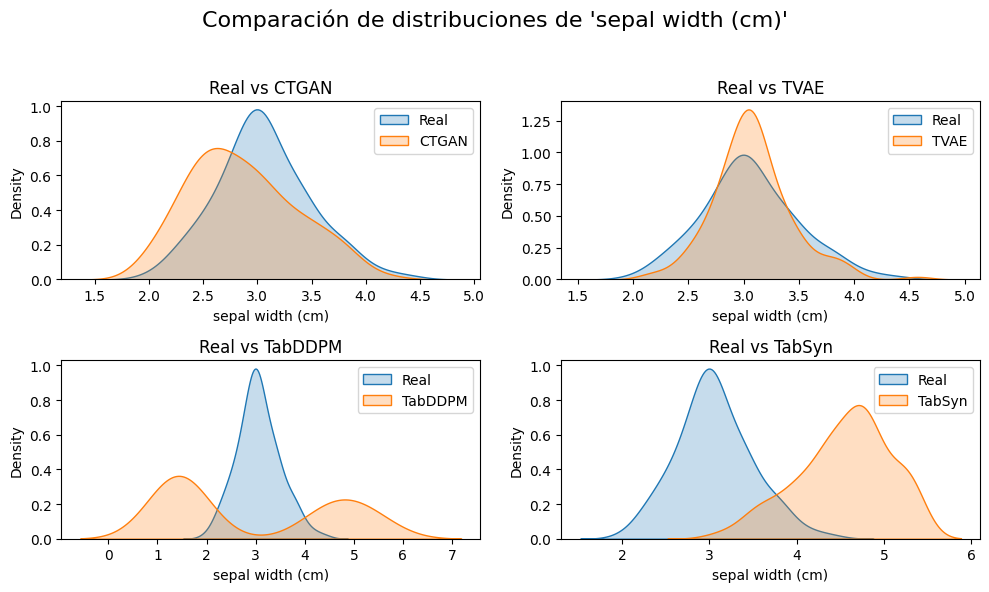

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle("Comparación de distribuciones de 'sepal width (cm)'", fontsize=16)

for ax, (df_model, name) in zip(axes.flatten(), model_data):
    sns.kdeplot(iris['sepal width (cm)'], label='Real', ax=ax, fill=True)
    sns.kdeplot(df_model['sepal width (cm)'], label=f'{name}', ax=ax, fill=True)
    ax.set_title(f'Real vs {name}')
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

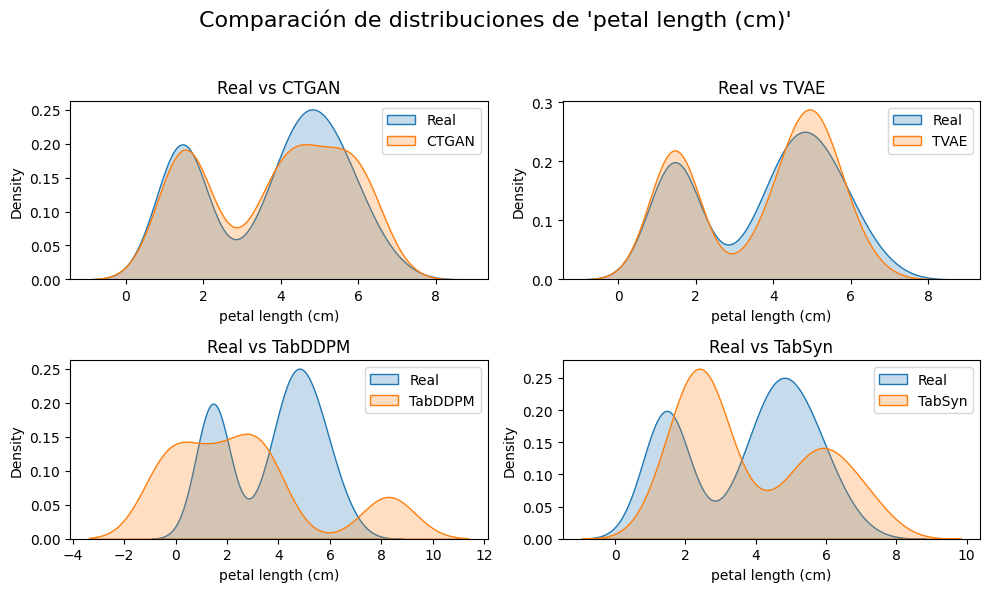

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle("Comparación de distribuciones de 'petal length (cm)'", fontsize=16)

for ax, (df_model, name) in zip(axes.flatten(), model_data):
    sns.kdeplot(iris['petal length (cm)'], label='Real', ax=ax, fill=True)
    sns.kdeplot(df_model['petal length (cm)'], label=f'{name}', ax=ax, fill=True)
    ax.set_title(f'Real vs {name}')
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

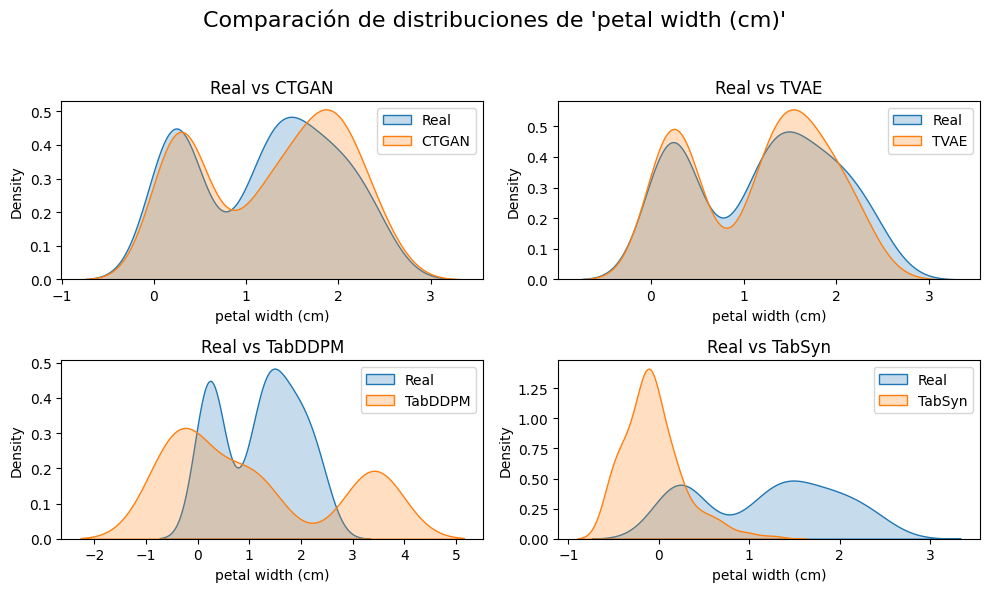

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle("Comparación de distribuciones de 'petal width (cm)'", fontsize=16)

for ax, (df_model, name) in zip(axes.flatten(), model_data):
    sns.kdeplot(iris['petal width (cm)'], label='Real', ax=ax, fill=True)
    sns.kdeplot(df_model['petal width (cm)'], label=f'{name}', ax=ax, fill=True)
    ax.set_title(f'Real vs {name}')
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

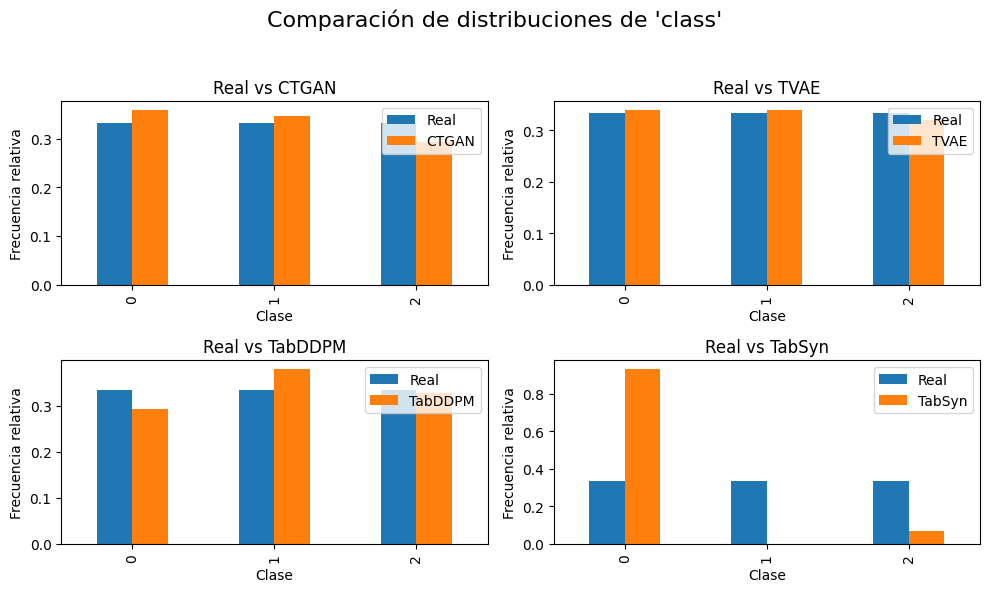

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle("Comparación de distribuciones de 'class'", fontsize=16)

for ax, (df_model, name) in zip(axes.flatten(), model_data):
    real_counts = iris['class'].value_counts(normalize=True).sort_index()
    gen_counts = df_model['class'].value_counts(normalize=True).sort_index()

    df_plot = pd.DataFrame({
        'Real': real_counts,
        name: gen_counts
    })

    df_plot.plot(kind='bar', ax=ax)
    ax.set_title(f"Real vs {name}")
    ax.set_ylabel("Frecuencia relativa")
    ax.set_xlabel("Clase")
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()